# Question 2

2) Implement a Convolutional Neural Network Model for Fashion MNIST Dataset in keras. Try to get predictions for some random inputs from the test data.


In [41]:
import os.path
import random
import numpy
from keras.datasets import fashion_mnist as fm
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
K.set_image_dim_ordering('th')

In [2]:
numpy.random.seed(7)
(X_train, y_train), (X_test, y_test) = fm.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train1=y_train
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [3]:
def larger_model():
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [43]:
if os.path.isfile("model2.json") and os.path.isfile("model2.h5"):
    print "Saved Model Found,Loading......"
    # load json and create model
    json_file = open('model2.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into model from saved file
    model.load_weights("model2.h5")
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    print("Loaded model from disk")
else:
    model = larger_model()
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4,batch_size=200)
    model_json = model.to_json()
    with open("model2.json", "w") as json_file:
        json_file.write(model_json)
        # serialize weights to HDF5
    model.save_weights("model2.h5")
    print("Saved model to disk")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


Saved Model Found,Loading......
Loaded model from disk
Large CNN Error: 2.50%


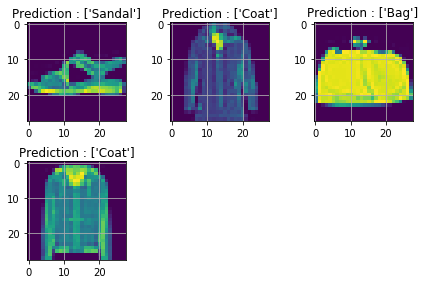

In [50]:
label=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
for j in range(1,5):
    k=random.randint(0,200)
    X1=X_train[k]
    X2=X1.reshape(1,1,28,28)
    p=model.predict(X2).round(0) 
    l=list((p==1)[0])
    title=[i for indx,i in enumerate(label) if l[indx] == True]
    plt.subplot(2,3,j)
    plt.grid('True')
    plt.imshow(X1[0,:,:])
    plt.title("Prediction : "+str(title))
    plt.tight_layout()
plt.show()

